# <center>Milky Way Globular Clusters & Machine Learning</center>

## <center>Introduction</center>
<center>write intro here</center>

## 0. Load Libraries

In [345]:
# Load the necesary libraries for our notebook
%matplotlib notebook
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## 0.1 Helper Functions

In [346]:
def non_numeric_cols(df):
    df = df.select_dtypes(exclude=np.number)
    return list(df.columns)
    

## 1. Data Exploration

## 1.1 Loading our data

In [347]:
data_dir = 'datasets/'

harris1 = pd.read_csv(data_dir+'harris_1.dat')
harris2 = pd.read_csv(data_dir+'harris_2.dat')
harris3 = pd.read_csv(data_dir+'harris_3.dat')
gaia_df = pd.read_csv(data_dir+'input.txt',delim_whitespace=True)

harris1.head(20) # View the header of our first table

,ID,Name,RA(2000),DEC,L,B,R_Sun,R_gc,X,Y,Z
0,NGC 104,47 Tuc,00 24 05.67,-72 04 52.6,305.89,-44.89,4.5,7.4,1.9,-2.6,-3.1
1,NGC 288,,00 52 45.24,-26 34 57.4,152.30,-89.38,8.9,12.0,-0.1,0.0,-8.9
2,NGC 362,,01 03 14.26,-70 50 55.6,301.53,-46.25,8.6,9.4,3.1,-5.1,-6.2
3,Whiting 1,,02 02 57,-03 15 10,161.22,-60.76,30.1,34.5,-13.9,4.7,-26.3
4,NGC 1261,,03 12 16.21,-55 12 58.4,270.54,-52.12,16.3,18.1,0.1,-10.0,-12.9
5,Pal 1,,03 33 20.04,+79 34 51.8,130.06,19.03,11.1,17.2,-6.8,8.1,3.6
6,AM 1,E 1,03 55 02.3,-49 36 55,258.34,-48.47,123.3,124.6,-16.5,-80.1,-92.3
7,Eridanus,,04 24 44.5,-21 11 13,218.10,-41.33,90.1,95.0,-53.2,-41.7,-59.5
8,Pal 2,,04 46 05.91,+31 22 53.4,170.53,-9.07,27.2,35.0,-26.4,4.4,-4.3
9,NGC 1851,,05 14 06.76,-40 02 47.6,244.51,-35.03,12.1,16.6,-4.2,-8.9,-6.9


In [348]:
harris2.head()

,ID,[Fe/H],wt,E(B-V),V_HB,(m-M)V,V_t,M_V,t,U-B,B-V,V-R,V-I,spt,ellip
0,NGC 104,-0.72,10,0.04,14.06,13.37,3.95,-9.42,0.37,0.88,0.53,1.14,G4,0.09,NaN
1,NGC 288,-1.32,3,0.03,15.44,14.84,8.09,-6.75,0.08,0.65,0.45,0.94,NaN,NaN,NaN
2,NGC 362,-1.26,5,0.05,15.44,14.83,6.40,-8.43,0.16,0.77,0.49,1.01,F9,0.01,NaN
3,Whiting 1,-0.70,1,0.03,18.18,17.49,15.03,-2.46,,,,,NaN,NaN,NaN
4,NGC 1261,-1.27,3,0.01,16.70,16.09,8.29,-7.80,0.13,0.72,0.45,0.93,F7,0.07,NaN


In [349]:
harris3.head()

,ID,v_r,v_r_err,v_LSR,sig_v,sig_v_err,c,r_c,r_h,mu_V,rho_0,lg(tc),lg(th)
0,NGC 104,-18.0,0.1,-26.7,11.0,0.3,2.07,0.36,3.17,14.38,4.88,7.84,9.55
1,NGC 288,-45.4,0.2,-51.9,2.9,0.3,0.99,1.35,2.23,20.05,1.78,8.99,9.32
2,NGC 362,223.5,0.5,214.0,6.4,0.3,1.76,0.18,0.82,14.80,4.74,7.76,8.93
3,Whiting 1,-130.6,1.8,-138.1,,,0.55,0.25,0.22,,,,7.93
4,NGC 1261,68.2,4.6,54.9,,,1.16,0.35,0.68,17.73,2.99,8.59,9.12


In [350]:
gaia_df

,Name,ra,dec,dist,disterr,vlos,vloserr,sigma,rmax,pmra,pmdec,plx,pmra_e,pmdec_e,pmcorr,plx_e
0,NGC_104_47Tuc,6.024,-72.081,4.52,0.03,-17.45,0.16,12.2,40.0,5.2516,-2.5515,0.2318,0.0214,0.0214,-0.0023,0.0095
1,NGC_288,13.188,-26.583,8.99,0.09,-44.45,0.13,3.3,15.0,4.1641,-5.7053,0.1410,0.0241,0.0243,0.0094,0.0106
2,NGC_362,15.809,-70.849,8.83,0.10,223.12,0.28,8.8,12.0,6.6935,-2.5354,0.1141,0.0245,0.0242,0.0039,0.0105
3,Whiting_1,30.737,-3.253,30.59,1.17,-130.41,1.79,0.3,3.0,-0.2277,-2.0458,0.0168,0.0653,0.0561,0.0333,0.0469
4,NGC_1261,48.068,-55.216,16.40,0.19,71.34,0.21,5.8,10.0,1.5957,-2.0642,0.0679,0.0249,0.0251,0.0082,0.0108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,NGC_7089_M_2,323.363,-0.823,11.69,0.11,-3.78,0.30,10.7,15.0,3.4346,-2.1588,0.0824,0.0247,0.0244,0.0136,0.0107
166,NGC_7099_M_30,325.092,-23.180,8.46,0.09,-185.19,0.17,5.6,12.0,-0.7374,-7.2987,0.1360,0.0246,0.0244,0.0125,0.0108
167,Pal_12,326.662,-21.253,18.49,0.30,27.91,0.28,0.7,4.0,-3.2197,-3.3335,0.0502,0.0291,0.0280,0.0767,0.0177
168,Pal_13,346.685,12.772,23.48,0.40,25.30,0.22,0.5,3.0,1.7475,0.1038,-0.0374,0.0487,0.0473,-0.0163,0.0337


## 1.2 Formatting Our Data
As you can see, we have multiple empty elements in our DataFrames. Let's take care of them. 

## 1.2.1 Replacing empty elements with NaN

In [351]:
harris1 = harris1.replace(r'^\s+$', np.nan, regex=True)
harris2 = harris2.replace(r'^\s+$', np.nan, regex=True)
harris3 = harris3.replace(r'^\s+$', np.nan, regex=True)

In [352]:
harris1.head() # As you can see the once empty elements now contain 'NaN'


,ID,Name,RA(2000),DEC,L,B,R_Sun,R_gc,X,Y,Z
0,NGC 104,47 Tuc,00 24 05.67,-72 04 52.6,305.89,-44.89,4.5,7.4,1.9,-2.6,-3.1
1,NGC 288,NaN,00 52 45.24,-26 34 57.4,152.30,-89.38,8.9,12.0,-0.1,0.0,-8.9
2,NGC 362,NaN,01 03 14.26,-70 50 55.6,301.53,-46.25,8.6,9.4,3.1,-5.1,-6.2
3,Whiting 1,NaN,02 02 57,-03 15 10,161.22,-60.76,30.1,34.5,-13.9,4.7,-26.3
4,NGC 1261,NaN,03 12 16.21,-55 12 58.4,270.54,-52.12,16.3,18.1,0.1,-10.0,-12.9


In [353]:
harris1.columns = harris1.columns.str.replace(' ','')
harris2.columns = harris2.columns.str.replace(' ','')
harris3.columns = harris3.columns.str.replace(' ','')

## 1.2.2 Reformating 'RA' and 'DEC'
To make our data easier to work with let's reformat our 'RA(2000)' and 'DEC' columns in a way that will make it easier to read in the future.

In [354]:
harris1['RA(2000)'] = harris1['RA(2000)'].replace(r'\s{2}', '', regex=True)
harris1['RA(2000)'] = harris1['RA(2000)'].replace(r'\s{1}', ':', regex=True)
harris1['DEC'] = harris1['DEC'].replace(r'\s{2}', '', regex=True)
harris1['DEC'] = harris1['DEC'].replace(r'\s{1}', ':', regex=True)

In [355]:
for column in non_numeric_cols(harris1):
    harris1[column] = harris1[column].str.replace(' ','')

for column in non_numeric_cols(harris2):
    harris2[column] = harris2[column].str.replace(' ','')

for column in non_numeric_cols(harris3):
    harris3[column] = harris3[column].str.replace(' ','')
harris3    

,ID,v_r,v_r_err,v_LSR,sig_v,sig_v_err,c,r_c,r_h,mu_V,rho_0,lg(tc),lg(th)
0,NGC104,-18.0,0.1,-26.7,11.0,0.3,2.07,0.36,3.17,14.38,4.88,7.84,9.55
1,NGC288,-45.4,0.2,-51.9,2.9,0.3,0.99,1.35,2.23,20.05,1.78,8.99,9.32
2,NGC362,223.5,0.5,214.0,6.4,0.3,1.76,0.18,0.82,14.80,4.74,7.76,8.93
3,Whiting1,-130.6,1.8,-138.1,NaN,NaN,0.55,0.25,0.22,NaN,NaN,NaN,7.93
4,NGC1261,68.2,4.6,54.9,NaN,NaN,1.16,0.35,0.68,17.73,2.99,8.59,9.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,NGC7089,-5.3,2.0,3.8,8.2,0.6,1.59,0.32,1.06,15.78,4.00,8.48,9.40
153,NGC7099,-184.2,0.2,-179.6,5.5,0.4,2.50,0.06,1.03,15.35,5.01,6.37,8.88
154,Pal12,27.8,1.5,32.5,NaN,NaN,2.98,0.02,1.72,19.21,3.64,5.22,9.28
155,Pal13,25.2,0.3,30.9,0.9,0.3,0.66,0.48,0.36,24.31,0.16,8.36,8.35


In [356]:
harris = harris1.merge(harris2, on='ID')
harris = harris.merge(harris3, on='ID')
harris.head(20)

,ID,Name,RA(2000),DEC,L,B,R_Sun,R_gc,X,Y,...,v_LSR,sig_v,sig_v_err,c,r_c,r_h,mu_V,rho_0,lg(tc),lg(th)
0,NGC104,47Tuc,00:24:05.67,-72:04:52.6,305.89,-44.89,4.5,7.4,1.9,-2.6,...,-26.7,11.0,0.3,2.07,0.36,3.17,14.38,4.88,7.84,9.55
1,NGC288,NaN,00:52:45.24,-26:34:57.4,152.30,-89.38,8.9,12.0,-0.1,0.0,...,-51.9,2.9,0.3,0.99,1.35,2.23,20.05,1.78,8.99,9.32
2,NGC362,NaN,01:03:14.26,-70:50:55.6,301.53,-46.25,8.6,9.4,3.1,-5.1,...,214.0,6.4,0.3,1.76,0.18,0.82,14.80,4.74,7.76,8.93
3,Whiting1,NaN,02:02:57:,-03:15:10,161.22,-60.76,30.1,34.5,-13.9,4.7,...,-138.1,NaN,NaN,0.55,0.25,0.22,NaN,NaN,NaN,7.93
4,NGC1261,NaN,03:12:16.21,-55:12:58.4,270.54,-52.12,16.3,18.1,0.1,-10.0,...,54.9,NaN,NaN,1.16,0.35,0.68,17.73,2.99,8.59,9.12
5,Pal1,NaN,03:33:20.04,+79:34:51.8,130.06,19.03,11.1,17.2,-6.8,8.1,...,-76.2,NaN,NaN,2.57,0.01,0.46,20.93,3.51,4.06,7.76
6,AM1,E1,03:55:02.3:,-49:36:55,258.34,-48.47,123.3,124.6,-16.5,-80.1,...,101.3,NaN,NaN,1.36,0.17,0.41,23.62,0.03,8.96,9.61
7,Eridanus,NaN,04:24:44.5:,-21:11:13,218.10,-41.33,90.1,95.0,-53.2,-41.7,...,-39.1,NaN,NaN,1.10,0.25,0.46,22.81,0.38,9.18,9.54
8,Pal2,NaN,04:46:05.91,+31:22:53.4,170.53,-9.07,27.2,35.0,-26.4,4.4,...,-140.1,NaN,NaN,1.53,0.17,0.50,19.06,4.06,8.82,9.28
9,NGC1851,NaN,05:14:06.76,-40:02:47.6,244.51,-35.03,12.1,16.6,-4.2,-8.9,...,303.8,10.4,0.5,1.86,0.09,0.51,14.25,5.09,7.43,8.82


In [357]:
harris.to_csv(data_dir+'harris.csv')

In [358]:
harris

,ID,Name,RA(2000),DEC,L,B,R_Sun,R_gc,X,Y,...,v_LSR,sig_v,sig_v_err,c,r_c,r_h,mu_V,rho_0,lg(tc),lg(th)
0,NGC104,47Tuc,00:24:05.67,-72:04:52.6,305.89,-44.89,4.5,7.4,1.9,-2.6,...,-26.7,11.0,0.3,2.07,0.36,3.17,14.38,4.88,7.84,9.55
1,NGC288,NaN,00:52:45.24,-26:34:57.4,152.30,-89.38,8.9,12.0,-0.1,0.0,...,-51.9,2.9,0.3,0.99,1.35,2.23,20.05,1.78,8.99,9.32
2,NGC362,NaN,01:03:14.26,-70:50:55.6,301.53,-46.25,8.6,9.4,3.1,-5.1,...,214.0,6.4,0.3,1.76,0.18,0.82,14.80,4.74,7.76,8.93
3,Whiting1,NaN,02:02:57:,-03:15:10,161.22,-60.76,30.1,34.5,-13.9,4.7,...,-138.1,NaN,NaN,0.55,0.25,0.22,NaN,NaN,NaN,7.93
4,NGC1261,NaN,03:12:16.21,-55:12:58.4,270.54,-52.12,16.3,18.1,0.1,-10.0,...,54.9,NaN,NaN,1.16,0.35,0.68,17.73,2.99,8.59,9.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,NGC7089,M2,21:33:27.02,-00:49:23.7,53.37,-35.77,11.5,10.4,5.6,7.5,...,3.8,8.2,0.6,1.59,0.32,1.06,15.78,4.00,8.48,9.40
153,NGC7099,M30,21:40:22.12,-23:10:47.5,27.18,-46.84,8.1,7.1,4.9,2.5,...,-179.6,5.5,0.4,2.50,0.06,1.03,15.35,5.01,6.37,8.88
154,Pal12,NaN,21:46:38.84,-21:15:09.4,30.51,-47.68,19.0,15.8,11.0,6.5,...,32.5,NaN,NaN,2.98,0.02,1.72,19.21,3.64,5.22,9.28
155,Pal13,NaN,23:06:44.44,+12:46:19.2,87.10,-42.70,26.0,26.9,1.0,19.1,...,30.9,0.9,0.3,0.66,0.48,0.36,24.31,0.16,8.36,8.35


In [359]:
# Convert our RA to degrees
hour2deg =harris['RA(2000)'].str[:2].to_numpy(dtype=float)*15
min2deg = harris['RA(2000)'].str[3:5].to_numpy(dtype=float)/4
sec2deg = harris['RA(2000)'].str[6:]

for i,cluster  in enumerate(sec2deg): 
    if cluster[-1] == ':':
        cluster = cluster.replace(":","")
        sec2deg[i] = cluster
sec2deg = sec2deg.to_numpy(dtype=float)/(4*60)
harris_ra = np.round(hour2deg+min2deg+sec2deg,3)
harris['RA(2000)'] = harris_ra

In [360]:
# Convert our DEC to degrees 
deg =harris['DEC'].str[:3].to_numpy(dtype=float)
min2deg = harris['DEC'].str[4:6].to_numpy(dtype=float)/60
sec2deg = harris['DEC'].str[7:].to_numpy(dtype=float)/(60*60)
for i, cluster in enumerate(deg):
    if cluster< 0:
        min2deg[i] = min2deg[i] * -1
        sec2deg[i] = sec2deg[i] * -1
harris_dec = np.round(deg+min2deg+sec2deg,3)
harris['DEC'] = harris_dec

In [361]:
harris.rename(columns={'DEC':'dec','RA(2000)':'ra'},inplace=True)

In [366]:
merged_df = harris.merge(gaia_df,how='inner',on=['ra','dec'])

In [367]:
harris

,ID,Name,ra,dec,L,B,R_Sun,R_gc,X,Y,...,v_LSR,sig_v,sig_v_err,c,r_c,r_h,mu_V,rho_0,lg(tc),lg(th)
0,NGC104,47Tuc,6.024,-72.081,305.89,-44.89,4.5,7.4,1.9,-2.6,...,-26.7,11.0,0.3,2.07,0.36,3.17,14.38,4.88,7.84,9.55
1,NGC288,NaN,13.188,-26.583,152.30,-89.38,8.9,12.0,-0.1,0.0,...,-51.9,2.9,0.3,0.99,1.35,2.23,20.05,1.78,8.99,9.32
2,NGC362,NaN,15.809,-70.849,301.53,-46.25,8.6,9.4,3.1,-5.1,...,214.0,6.4,0.3,1.76,0.18,0.82,14.80,4.74,7.76,8.93
3,Whiting1,NaN,30.738,-3.253,161.22,-60.76,30.1,34.5,-13.9,4.7,...,-138.1,NaN,NaN,0.55,0.25,0.22,NaN,NaN,NaN,7.93
4,NGC1261,NaN,48.068,-55.216,270.54,-52.12,16.3,18.1,0.1,-10.0,...,54.9,NaN,NaN,1.16,0.35,0.68,17.73,2.99,8.59,9.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,NGC7089,M2,323.363,0.823,53.37,-35.77,11.5,10.4,5.6,7.5,...,3.8,8.2,0.6,1.59,0.32,1.06,15.78,4.00,8.48,9.40
153,NGC7099,M30,325.092,-23.180,27.18,-46.84,8.1,7.1,4.9,2.5,...,-179.6,5.5,0.4,2.50,0.06,1.03,15.35,5.01,6.37,8.88
154,Pal12,NaN,326.662,-21.253,30.51,-47.68,19.0,15.8,11.0,6.5,...,32.5,NaN,NaN,2.98,0.02,1.72,19.21,3.64,5.22,9.28
155,Pal13,NaN,346.685,12.772,87.10,-42.70,26.0,26.9,1.0,19.1,...,30.9,0.9,0.3,0.66,0.48,0.36,24.31,0.16,8.36,8.35


In [368]:
gaia_df

,Name,ra,dec,dist,disterr,vlos,vloserr,sigma,rmax,pmra,pmdec,plx,pmra_e,pmdec_e,pmcorr,plx_e
0,NGC_104_47Tuc,6.024,-72.081,4.52,0.03,-17.45,0.16,12.2,40.0,5.2516,-2.5515,0.2318,0.0214,0.0214,-0.0023,0.0095
1,NGC_288,13.188,-26.583,8.99,0.09,-44.45,0.13,3.3,15.0,4.1641,-5.7053,0.1410,0.0241,0.0243,0.0094,0.0106
2,NGC_362,15.809,-70.849,8.83,0.10,223.12,0.28,8.8,12.0,6.6935,-2.5354,0.1141,0.0245,0.0242,0.0039,0.0105
3,Whiting_1,30.737,-3.253,30.59,1.17,-130.41,1.79,0.3,3.0,-0.2277,-2.0458,0.0168,0.0653,0.0561,0.0333,0.0469
4,NGC_1261,48.068,-55.216,16.40,0.19,71.34,0.21,5.8,10.0,1.5957,-2.0642,0.0679,0.0249,0.0251,0.0082,0.0108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,NGC_7089_M_2,323.363,-0.823,11.69,0.11,-3.78,0.30,10.7,15.0,3.4346,-2.1588,0.0824,0.0247,0.0244,0.0136,0.0107
166,NGC_7099_M_30,325.092,-23.180,8.46,0.09,-185.19,0.17,5.6,12.0,-0.7374,-7.2987,0.1360,0.0246,0.0244,0.0125,0.0108
167,Pal_12,326.662,-21.253,18.49,0.30,27.91,0.28,0.7,4.0,-3.2197,-3.3335,0.0502,0.0291,0.0280,0.0767,0.0177
168,Pal_13,346.685,12.772,23.48,0.40,25.30,0.22,0.5,3.0,1.7475,0.1038,-0.0374,0.0487,0.0473,-0.0163,0.0337


In [369]:
merged_df[['ID','Name_y']]

,ID,Name_y
0,NGC104,NGC_104_47Tuc
1,NGC288,NGC_288
2,NGC362,NGC_362
3,NGC1261,NGC_1261
4,AM1,AM_1
...,...,...
124,NGC7006,NGC_7006
125,NGC7078,NGC_7078_M_15
126,NGC7099,NGC_7099_M_30
127,Pal12,Pal_12


In [287]:
list(merged_df.columns)

['ID',
 'Name_x',
 'ra',
 'dec',
 'L',
 'B',
 'R_Sun',
 'R_gc',
 'X',
 'Y',
 'Z',
 '[Fe/H]',
 'wt',
 'E(B-V)',
 'V_HB',
 '(m-M)V',
 'V_t',
 'M_V',
 't',
 'U-B',
 'B-V',
 'V-R',
 'V-I',
 'spt',
 'ellip',
 'v_r',
 'v_r_err',
 'v_LSR',
 'sig_v',
 'sig_v_err',
 'c',
 'r_c',
 'r_h',
 'mu_V',
 'rho_0',
 'lg(tc)',
 'lg(th)',
 'Name_y',
 'dist',
 'disterr',
 'vlos',
 'vloserr',
 'sigma',
 'rmax',
 'pmra',
 'pmdec',
 'plx',
 'pmra_e',
 'pmdec_e',
 'pmcorr',
 'plx_e']

In [288]:
merged_df.drop(['ID',
                'Name_x',
                'Name_y',
                'ra',
                'dec',
                'L',
                'B',
                'R_Sun',
                'X',
                'Y',
                'Z',
                '(m-M)V',
                'V_t',
                'v_r',
                'v_r_err',
                'v_LSR',
                'V-I'
               ],
              axis=1,
              inplace=True)


In [373]:
harris = merged_df
merged_df

,ID,Name_x,ra,dec,L,B,R_Sun,R_gc,X,Y,...,vloserr,sigma,rmax,pmra,pmdec,plx,pmra_e,pmdec_e,pmcorr,plx_e
0,NGC104,47Tuc,6.024,-72.081,305.89,-44.89,4.5,7.4,1.9,-2.6,...,0.16,12.2,40.0,5.2516,-2.5515,0.2318,0.0214,0.0214,-0.0023,0.0095
1,NGC288,NaN,13.188,-26.583,152.30,-89.38,8.9,12.0,-0.1,0.0,...,0.13,3.3,15.0,4.1641,-5.7053,0.1410,0.0241,0.0243,0.0094,0.0106
2,NGC362,NaN,15.809,-70.849,301.53,-46.25,8.6,9.4,3.1,-5.1,...,0.28,8.8,12.0,6.6935,-2.5354,0.1141,0.0245,0.0242,0.0039,0.0105
3,NGC1261,NaN,48.068,-55.216,270.54,-52.12,16.3,18.1,0.1,-10.0,...,0.21,5.8,10.0,1.5957,-2.0642,0.0679,0.0249,0.0251,0.0082,0.0108
4,AM1,E1,58.760,-49.615,258.34,-48.47,123.3,124.6,-16.5,-80.1,...,14.14,1.2,2.5,0.2912,-0.1772,-0.0124,0.1071,0.0859,-0.2230,0.0602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,NGC7006,NaN,315.372,16.187,63.77,-19.41,41.2,38.5,17.2,34.8,...,0.73,3.6,5.0,-0.1275,-0.6329,0.0349,0.0274,0.0270,0.0017,0.0149
125,NGC7078,M15,322.493,12.167,65.01,-27.31,10.4,10.4,3.9,8.3,...,0.30,13.6,15.0,-0.6588,-3.8025,0.0968,0.0239,0.0236,0.0138,0.0104
126,NGC7099,M30,325.092,-23.180,27.18,-46.84,8.1,7.1,4.9,2.5,...,0.17,5.6,12.0,-0.7374,-7.2987,0.1360,0.0246,0.0244,0.0125,0.0108
127,Pal12,NaN,326.662,-21.253,30.51,-47.68,19.0,15.8,11.0,6.5,...,0.28,0.7,4.0,-3.2197,-3.3335,0.0502,0.0291,0.0280,0.0767,0.0177


## Data Cleaning

In [290]:
list(harris.columns)

['R_gc',
 '[Fe/H]',
 'wt',
 'E(B-V)',
 'V_HB',
 'M_V',
 't',
 'U-B',
 'B-V',
 'V-R',
 'spt',
 'ellip',
 'sig_v',
 'sig_v_err',
 'c',
 'r_c',
 'r_h',
 'mu_V',
 'rho_0',
 'lg(tc)',
 'lg(th)',
 'dist',
 'disterr',
 'vlos',
 'vloserr',
 'sigma',
 'rmax',
 'pmra',
 'pmdec',
 'plx',
 'pmra_e',
 'pmdec_e',
 'pmcorr',
 'plx_e']

## Data Visualization

In [291]:

harris

,R_gc,[Fe/H],wt,E(B-V),V_HB,M_V,t,U-B,B-V,V-R,...,vloserr,sigma,rmax,pmra,pmdec,plx,pmra_e,pmdec_e,pmcorr,plx_e
0,7.4,-0.72,10,0.04,14.06,-9.42,0.37,0.88,0.53,1.14,...,0.16,12.2,40.0,5.2516,-2.5515,0.2318,0.0214,0.0214,-0.0023,0.0095
1,12.0,-1.32,3,0.03,15.44,-6.75,0.08,0.65,0.45,0.94,...,0.13,3.3,15.0,4.1641,-5.7053,0.1410,0.0241,0.0243,0.0094,0.0106
2,9.4,-1.26,5,0.05,15.44,-8.43,0.16,0.77,0.49,1.01,...,0.28,8.8,12.0,6.6935,-2.5354,0.1141,0.0245,0.0242,0.0039,0.0105
3,18.1,-1.27,3,0.01,16.70,-7.80,0.13,0.72,0.45,0.93,...,0.21,5.8,10.0,1.5957,-2.0642,0.0679,0.0249,0.0251,0.0082,0.0108
4,124.6,-1.70,2,0.00,21.00,-4.73,NaN,0.72,NaN,NaN,...,14.14,1.2,2.5,0.2912,-0.1772,-0.0124,0.1071,0.0859,-0.2230,0.0602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,38.5,-1.52,6,0.05,18.80,-7.67,0.06,0.75,NaN,0.98,...,0.73,3.6,5.0,-0.1275,-0.6329,0.0349,0.0274,0.0270,0.0017,0.0149
125,10.4,-2.37,11,0.10,15.83,-9.19,0.06,0.68,NaN,0.85,...,0.30,13.6,15.0,-0.6588,-3.8025,0.0968,0.0239,0.0236,0.0138,0.0104
126,7.1,-2.27,4,0.03,15.10,-7.45,0.03,0.60,0.41,0.86,...,0.17,5.6,12.0,-0.7374,-7.2987,0.1360,0.0246,0.0244,0.0125,0.0108
127,15.8,-0.85,6,0.02,17.13,-4.47,0.34,1.07,NaN,NaN,...,0.28,0.7,4.0,-3.2197,-3.3335,0.0502,0.0291,0.0280,0.0767,0.0177


In [292]:
non_numeric = harris.select_dtypes(exclude=np.number)
non_numeric_cols = list(non_numeric.columns)
non_numeric

,[Fe/H],M_V,t,U-B,B-V,V-R,sig_v,sig_v_err,c,r_c,r_h,mu_V,rho_0,lg(tc),lg(th)
0,-0.72,-9.42,0.37,0.88,0.53,1.14,11.0,0.3,2.07,0.36,3.17,14.38,4.88,7.84,9.55
1,-1.32,-6.75,0.08,0.65,0.45,0.94,2.9,0.3,0.99,1.35,2.23,20.05,1.78,8.99,9.32
2,-1.26,-8.43,0.16,0.77,0.49,1.01,6.4,0.3,1.76,0.18,0.82,14.80,4.74,7.76,8.93
3,-1.27,-7.80,0.13,0.72,0.45,0.93,NaN,NaN,1.16,0.35,0.68,17.73,2.99,8.59,9.12
4,-1.70,-4.73,NaN,0.72,NaN,NaN,NaN,NaN,1.36,0.17,0.41,23.62,0.03,8.96,9.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,-1.52,-7.67,0.06,0.75,NaN,0.98,NaN,NaN,1.41,0.17,0.44,18.62,2.58,8.66,9.42
125,-2.37,-9.19,0.06,0.68,NaN,0.85,13.5,0.9,2.29,0.14,1.00,14.21,5.05,7.84,9.32
126,-2.27,-7.45,0.03,0.60,0.41,0.86,5.5,0.4,2.50,0.06,1.03,15.35,5.01,6.37,8.88
127,-0.85,-4.47,0.34,1.07,NaN,NaN,NaN,NaN,2.98,0.02,1.72,19.21,3.64,5.22,9.28


In [293]:
for column in non_numeric:
    harris[column] = pd.to_numeric(harris[column])

In [294]:
harris.dtypes

R_gc         float64
[Fe/H]       float64
wt             int64
E(B-V)       float64
V_HB         float64
M_V          float64
t            float64
U-B          float64
B-V          float64
V-R          float64
spt          float64
ellip        float64
sig_v        float64
sig_v_err    float64
c            float64
r_c          float64
r_h          float64
mu_V         float64
rho_0        float64
lg(tc)       float64
lg(th)       float64
dist         float64
disterr      float64
vlos         float64
vloserr      float64
sigma        float64
rmax         float64
pmra         float64
pmdec        float64
plx          float64
pmra_e       float64
pmdec_e      float64
pmcorr       float64
plx_e        float64
dtype: object

In [296]:
corr = harris.corr()

In [297]:
list(harris.columns)

['R_gc',
 '[Fe/H]',
 'wt',
 'E(B-V)',
 'V_HB',
 'M_V',
 't',
 'U-B',
 'B-V',
 'V-R',
 'spt',
 'ellip',
 'sig_v',
 'sig_v_err',
 'c',
 'r_c',
 'r_h',
 'mu_V',
 'rho_0',
 'lg(tc)',
 'lg(th)',
 'dist',
 'disterr',
 'vlos',
 'vloserr',
 'sigma',
 'rmax',
 'pmra',
 'pmdec',
 'plx',
 'pmra_e',
 'pmdec_e',
 'pmcorr',
 'plx_e']

<IPython.core.display.Javascript object>


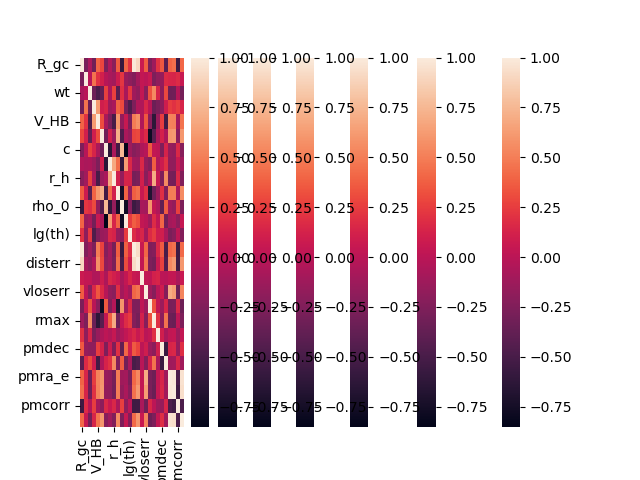

In [298]:
corr_heat = sns.heatmap(corr)

In [313]:
harris['[Fe/H]']

0     -0.72
1     -1.32
2     -1.26
3     -1.27
4     -1.70
       ... 
124   -1.52
125   -2.37
126   -2.27
127   -0.85
128   -1.88
Name: [Fe/H], Length: 129, dtype: float64

In [314]:
null_threshhold = 0.1
null_rate = harris.isnull().sum(axis=0) / len(harris)
null_bool = null_rate > null_threshhold
null_cols = list(null_bool[null_bool == True].index)
null_cols

[]

In [315]:
harris.drop(null_cols, inplace=True,axis=1)
harris

,R_gc,[Fe/H],wt,E(B-V),V_HB,M_V,c,r_c,r_h,mu_V,...,vloserr,sigma,rmax,pmra,pmdec,plx,pmra_e,pmdec_e,pmcorr,plx_e
0,7.4,-0.72,10,0.04,14.06,-9.42,2.07,0.36,3.17,14.38,...,0.16,12.2,40.0,5.2516,-2.5515,0.2318,0.0214,0.0214,-0.0023,0.0095
1,12.0,-1.32,3,0.03,15.44,-6.75,0.99,1.35,2.23,20.05,...,0.13,3.3,15.0,4.1641,-5.7053,0.1410,0.0241,0.0243,0.0094,0.0106
2,9.4,-1.26,5,0.05,15.44,-8.43,1.76,0.18,0.82,14.80,...,0.28,8.8,12.0,6.6935,-2.5354,0.1141,0.0245,0.0242,0.0039,0.0105
3,18.1,-1.27,3,0.01,16.70,-7.80,1.16,0.35,0.68,17.73,...,0.21,5.8,10.0,1.5957,-2.0642,0.0679,0.0249,0.0251,0.0082,0.0108
4,124.6,-1.70,2,0.00,21.00,-4.73,1.36,0.17,0.41,23.62,...,14.14,1.2,2.5,0.2912,-0.1772,-0.0124,0.1071,0.0859,-0.2230,0.0602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,38.5,-1.52,6,0.05,18.80,-7.67,1.41,0.17,0.44,18.62,...,0.73,3.6,5.0,-0.1275,-0.6329,0.0349,0.0274,0.0270,0.0017,0.0149
125,10.4,-2.37,11,0.10,15.83,-9.19,2.29,0.14,1.00,14.21,...,0.30,13.6,15.0,-0.6588,-3.8025,0.0968,0.0239,0.0236,0.0138,0.0104
126,7.1,-2.27,4,0.03,15.10,-7.45,2.50,0.06,1.03,15.35,...,0.17,5.6,12.0,-0.7374,-7.2987,0.1360,0.0246,0.0244,0.0125,0.0108
127,15.8,-0.85,6,0.02,17.13,-4.47,2.98,0.02,1.72,19.21,...,0.28,0.7,4.0,-3.2197,-3.3335,0.0502,0.0291,0.0280,0.0767,0.0177


In [316]:
# harris.drop(['v_r_err'], inplace=True,axis=1)
list(harris.columns)

['R_gc',
 '[Fe/H]',
 'wt',
 'E(B-V)',
 'V_HB',
 'M_V',
 'c',
 'r_c',
 'r_h',
 'mu_V',
 'rho_0',
 'lg(tc)',
 'lg(th)',
 'dist',
 'disterr',
 'vlos',
 'vloserr',
 'sigma',
 'rmax',
 'pmra',
 'pmdec',
 'plx',
 'pmra_e',
 'pmdec_e',
 'pmcorr',
 'plx_e']

In [334]:
corr= harris.corr()
corr.shape

(26, 26)

<IPython.core.display.Javascript object>


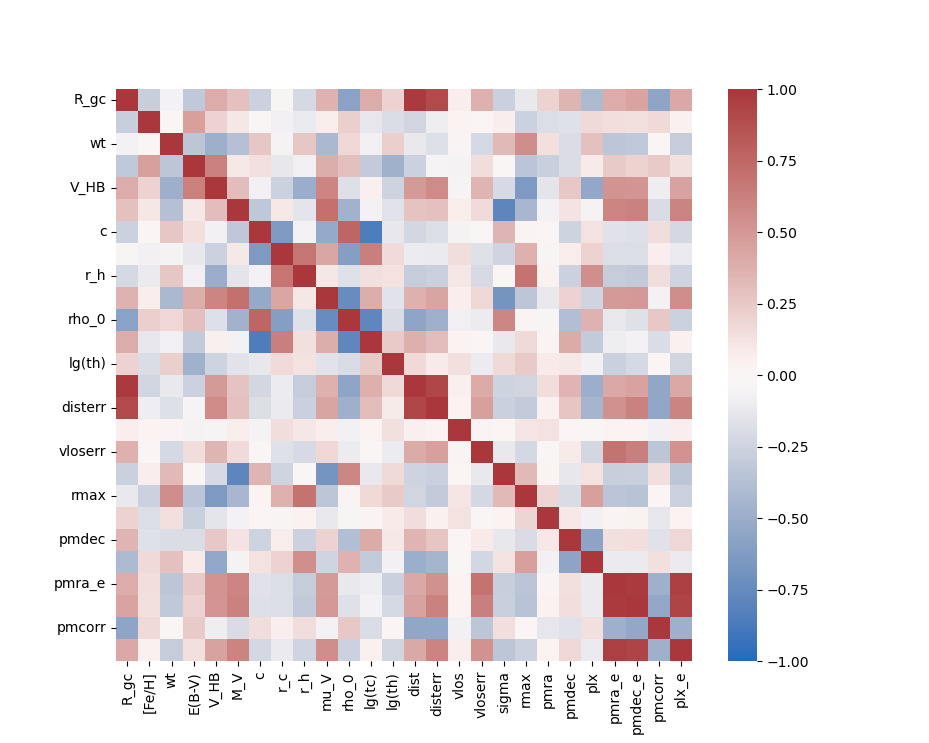

In [336]:
cmap= sns.color_palette("vlag", as_cmap=True)
corr_heat = sns.heatmap(corr, cmap=cmap,center=0,vmax=1,vmin=-1)

In [341]:
parameter = '[Fe/H]'
corr[parameter].sort_values(ascending=False,key=abs)

[Fe/H]     1.000000
E(B-V)     0.454517
R_gc      -0.281742
rmax      -0.261860
dist      -0.240588
rho_0      0.224359
V_HB       0.198202
lg(th)    -0.190195
pmra      -0.182661
pmcorr     0.169546
plx        0.165466
pmdec     -0.164576
pmra_e     0.143187
pmdec_e    0.137497
lg(tc)    -0.137407
r_h       -0.113741
M_V        0.103994
disterr   -0.095662
mu_V       0.077638
r_c       -0.073053
sigma      0.065306
plx_e      0.051867
vlos       0.031385
c         -0.017250
wt        -0.010386
vloserr    0.006686
Name: [Fe/H], dtype: float64

In [342]:
parameter = 'c'
corr[parameter].sort_values(ascending=False,key=abs)

c          1.000000
lg(tc)    -0.852843
rho_0      0.759816
r_c       -0.639610
mu_V      -0.529478
sigma      0.350708
M_V       -0.322931
wt         0.262406
R_gc      -0.261615
pmdec     -0.254371
dist      -0.228675
plx_e     -0.222197
disterr   -0.183913
pmdec_e   -0.175431
pmra_e    -0.157461
pmcorr     0.154685
E(B-V)     0.133020
lg(th)    -0.126549
plx        0.125532
V_HB      -0.071259
r_h       -0.066479
vlos      -0.057584
rmax       0.032001
[Fe/H]    -0.017250
pmra       0.015379
vloserr   -0.015191
Name: c, dtype: float64

In [343]:
parameter = 'M_V'
corr[parameter].sort_values(ascending=False,key=abs)

M_V        1.000000
sigma     -0.783112
mu_V       0.709200
pmdec_e    0.615602
plx_e      0.606490
pmra_e     0.598729
rho_0     -0.466620
rmax      -0.431975
wt        -0.370392
c         -0.322931
V_HB       0.308999
disterr    0.291577
R_gc       0.289470
dist       0.273561
pmcorr    -0.196261
vloserr    0.163866
lg(th)    -0.150494
r_h       -0.143379
pmdec      0.122318
[Fe/H]     0.103994
r_c        0.096447
E(B-V)     0.096040
vlos       0.074841
lg(tc)    -0.069534
pmra      -0.063534
plx       -0.056760
Name: M_V, dtype: float64